## Advertising Sales Channel Prediction

Problem Statement:
Sales Channel Prediction Case Study  

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

The below link provided is for downloading the dataset. 

Downlaod Files:
https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv

In [2]:
#importing libraries

import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")

In [4]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df = df.set_index('Unnamed: 0')

Making "Unnamed: 0" Columns as index column

In [6]:
df.head()

,TV,radio,newspaper,sales
Unnamed: 0,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


There are all float values in the column

In [8]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

There is no null values in data

In [9]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
(df["radio"]==0).value_counts()

False    199
True       1
Name: radio, dtype: int64

In [11]:
df.loc[df["radio"]==0]

,TV,radio,newspaper,sales
Unnamed: 0,,,,
128,80.2,0.0,9.2,8.8


There is one row having value 0 in radio column, not dropping it because other columns having values.so that would help us for prediction

# Exploratory Data Analysis

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import warnings
warnings.filterwarnings('ignore')

In [13]:
corr=df.corr()

                 TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000


<AxesSubplot:>

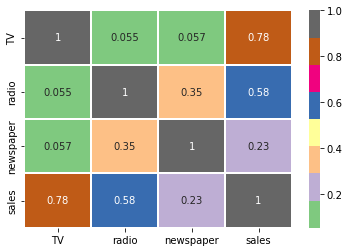

In [14]:
print(corr)
sns.heatmap(corr,cmap="Accent", annot=True, linewidth=0.2)

1. Here, we can notice that sale is highly corelated with TV advertisement
2. Newspaper ads have very  less effect on sale

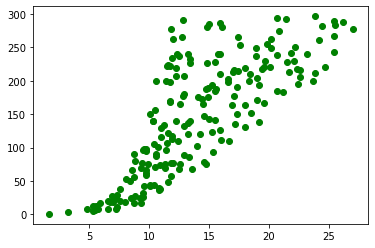

In [15]:
plt.scatter(x = 'sales', y = 'TV', data = df,c='g')

Look here the count around 25 TV ads sales going upto count of 300


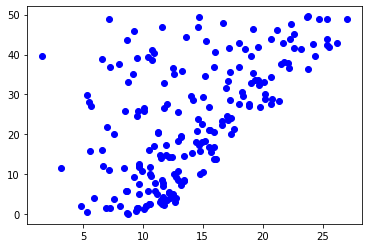

In [16]:
plt.scatter(x = 'sales', y = 'radio', data = df,c='b')

here we notice with help of around 25 ads of radio sales going upto 50 only


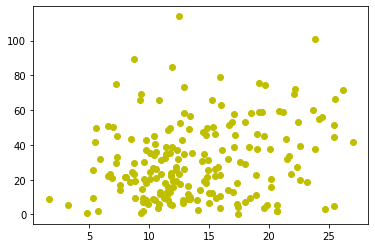

In [17]:
plt.scatter(x = 'sales', y = 'newspaper', data = df,c='y')

here we notice around 25 ads of newspaper sale spreads sometime up and somtime down


### CONCLUSION

* If we focus on TV Advertisement more we can get more sales, We have to work hard & some creative more on Radio & Newspaper Ads to get more sales


# checking for outliers


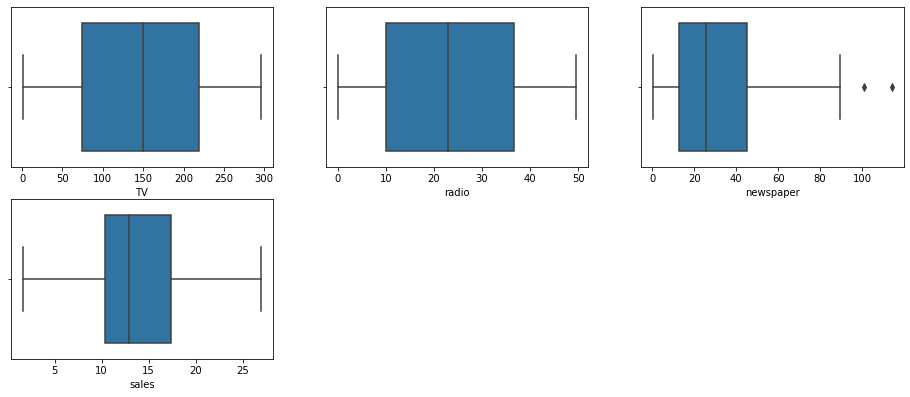

In [18]:
plt.figure(figsize=(16,10))
for o in enumerate(df):
    plt.subplot(3,3,o[0]+1)
    sns.boxplot(df[o[1]])

In the above boxplot we have outliers in the "newspaper" column

### Lets remove the outliers

#### ZSCORE METHOD

In [19]:
#zscore 

from scipy.stats import zscore

z = np.abs(zscore(df))

print(np.where(z>3))


(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))


In [20]:
df_1=df[(z<3).all(axis=1)]
print("with outliers::",df.shape)
print("After removing outliers::",df_1.shape)


with outliers:: (200, 4)
After removing outliers:: (198, 4)


# IQR METHOD

In [21]:
#IQR
from scipy import stats
IQR = stats.iqr(df)
IQR

38.525

In [22]:
Q1= df.quantile(0.25)
Q3= df.quantile(0.75)

In [23]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(174, 4)


We can notice using IQR method for outliers removal there is huge data loss so considering ZSCORE METHOD


In [24]:
df=df_1


In [25]:
df.shape

(198, 4)

{'whiskers': [<matplotlib.lines.Line2D at 0x23d6128bca0>,
 'caps': [<matplotlib.lines.Line2D at 0x23d61299160>,
 'boxes': [<matplotlib.lines.Line2D at 0x23d6128b910>],
 'medians': [<matplotlib.lines.Line2D at 0x23d61299880>],
 'fliers': [<matplotlib.lines.Line2D at 0x23d61299c10>],
 'means': []}

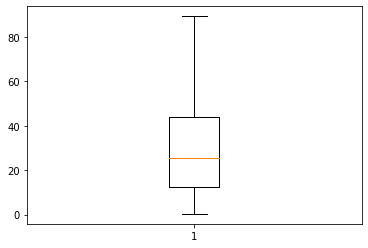

In [26]:
plt.boxplot(df['newspaper'])

We can see here the outliers have been removed from newspaper column

## Lets Check for Skewness

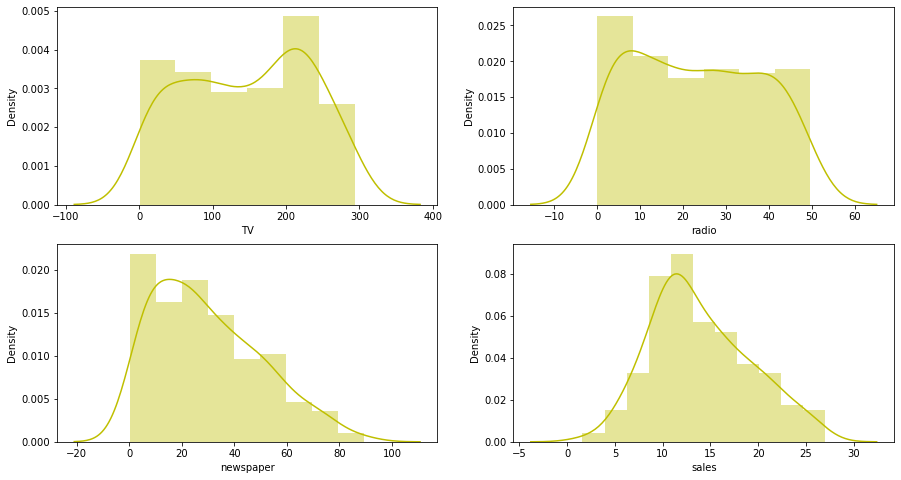

In [27]:
plt.figure(figsize=(15,8))
for i in enumerate(df):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(df[i[1]],color='y')

In [28]:
df.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

we can see here there is skewness in newspaper columns


### Removing the Skewness

In [29]:
df['newspaper']=np.sqrt(df['newspaper'])

In [30]:
df.skew()

TV          -0.082332
radio        0.114842
newspaper   -0.040649
sales        0.407130
dtype: float64

Now the skewness has been removed from newspaper column

In [31]:
x=df.drop(['sales'], axis=1)
y=df['sales']

In [32]:
print(x.shape)
print(y.shape)

(198, 3)
(198,)


### SCALLING DATA

In [33]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)


In [34]:
pd.DataFrame(x).describe()

,0,1,2
count,198.000000,198.000000,198.000000
mean,0.498424,0.466347,0.509620
std,0.291715,0.299639,0.222222
min,0.000000,0.000000,0.000000
25%,0.252987,0.200101,0.337801
50%,0.508877,0.451613,0.506534
75%,0.743513,0.732359,0.683610
max,1.000000,1.000000,1.000000


In [35]:
x.shape

(198, 3)

# MODEL BUILDING

## Linear Regression

In [36]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression


In [37]:
LR=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is: {r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is: {r2_score(y_train,LR_predict_train)}')
    print('\n')

At random state 0, The training accuracy is: 0.8899808679263099
At random state 0, The test accuracy is: 0.8899808679263099


At random state 1, The training accuracy is: 0.8945018460466634
At random state 1, The test accuracy is: 0.8945018460466634


At random state 2, The training accuracy is: 0.9104895320853252
At random state 2, The test accuracy is: 0.9104895320853252


At random state 3, The training accuracy is: 0.8945008732306111
At random state 3, The test accuracy is: 0.8945008732306111


At random state 4, The training accuracy is: 0.8980063011610756
At random state 4, The test accuracy is: 0.8980063011610756


At random state 5, The training accuracy is: 0.8993019881675024
At random state 5, The test accuracy is: 0.8993019881675024


At random state 6, The training accuracy is: 0.8991574664390982
At random state 6, The test accuracy is: 0.8991574664390982


At random state 7, The training accuracy is: 0.890944609101688
At random state 7, The test accuracy is: 0.890944609101

random state=10 giving highest accurancy, choosing that as random state

#### SPLITTING THE DATA WITH RANDOM STATE = 10

In [38]:
#splitting the data into 80% training and 20% testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.27,random_state=10)


In [39]:
x_train.shape

(144, 3)

In [40]:
x_test.shape

(54, 3)

In [41]:
y_train.shape

(144,)

In [42]:
y_test.shape

(54,)

In [43]:
from sklearn.linear_model import LinearRegression

LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.9245786668414235


In [44]:
print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print('r2_score:',r2_score(LR_predict,y_test))


MSE: 5.304745537381775
MAE: 1.6658326319324364
r2_score: 0.7769828816216668


## Ridge

In [45]:
from sklearn.linear_model import Ridge

R=Ridge()
R.fit(x_train,y_train)
print(R.score(x_train,y_train))
R_predict=R.predict(x_test)

0.9196432177230895


In [46]:
print('MSE:',mean_squared_error(R_predict,y_test))
print('MAE:',mean_absolute_error(R_predict,y_test))
print('r2_score:',r2_score(R_predict,y_test))

MSE: 5.543494620347605
MAE: 1.6879801584468708
r2_score: 0.7270645895933256


# SVR

### SVR(kernel='linear')

In [47]:
from sklearn.svm import SVR

svr=SVR(kernel='linear')
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
svr_predict=svr.predict(x_test)

0.9019313452822432


In [48]:
print('MSE:',mean_squared_error(svr_predict,y_test))
print('MAE:',mean_absolute_error(svr_predict,y_test))
print('r2_score:',r2_score(svr_predict,y_test))

MSE: 6.407804039412683
MAE: 1.7357326800074038
r2_score: 0.6218905402285622


### SVR(kernel='poly')

In [50]:
svr_p=SVR(kernel='poly')
svr_p.fit(x_train,y_train)
print(svr_p.score(x_train,y_train))
svrpred_p=svr_p.predict(x_test)

0.9013837929180802


In [51]:
print('MSE:',mean_squared_error(svrpred_p,y_test))
print('MAE:',mean_absolute_error(svrpred_p,y_test))
print('r2_score:',r2_score(svrpred_p,y_test))

MSE: 4.122206973930409
MAE: 1.441487697052796
r2_score: 0.8261092477808017


### (kernel='rbf')

In [53]:
svr_r=SVR(kernel='rbf')
svr_r.fit(x_train,y_train)
print(svr_r.score(x_train,y_train))
svrpred_r=svr_r.predict(x_test)

0.9360530604122108


In [54]:
print('MSE:',mean_squared_error(svrpred_r,y_test))
print('MAE:',mean_absolute_error(svrpred_r,y_test))
print('r2_score:',r2_score(svrpred_r,y_test))

MSE: 4.097407825197738
MAE: 1.1863247095998342
r2_score: 0.7390933860686082


## RandomForestRegressor

In [55]:
from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor()
RF.fit(x_train,y_train)
print(RF.score(x_train,y_train))
RF_PRED=RF.predict(x_test)

0.9970701264559106


In [56]:
print('MSE:',mean_squared_error(RF_PRED,y_test))
print('MAE:',mean_absolute_error(RF_PRED,y_test))
print('r2_score:',r2_score(RF_PRED,y_test))

MSE: 0.7662635370370346
MAE: 0.6017592592592592
r2_score: 0.9677518292816402


## DecisionTreeRegressor

In [57]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

1.0


In [58]:
print('MSE:',mean_squared_error(DTR_PRED,y_test))
print('MAE:',mean_absolute_error(DTR_PRED,y_test))
print('r2_score:',r2_score(DTR_PRED,y_test))

MSE: 1.3875925925925927
MAE: 0.8166666666666667
r2_score: 0.9462920143248904


## GradientBoostingRegressor


In [59]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

0.9991283570674452


In [60]:
print('MSE:',mean_squared_error(GBR_PRED,y_test))
print('MAE:',mean_absolute_error(GBR_PRED,y_test))
print('r2_score:',r2_score(GBR_PRED,y_test))

MSE: 0.7712292143175509
MAE: 0.5719130806235577
r2_score: 0.9688695645918208


## Cross validation

In [61]:
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model, x,y):
    rmse =- (cross_val_score(model, x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)


models = [LinearRegression(),
             Ridge(),
             SVR(kernel='linear'),
             SVR(kernel='poly'),
             SVR(kernel='rbf'),
             RandomForestRegressor(),
             DecisionTreeRegressor(),  
             GradientBoostingRegressor(),]
            


names = ['LR','R','svr','svr_p','svr_r','RF','DTR','GBR']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR    : 3.058460, 1.798248
R    : 3.119994, 1.912683
svr    : 3.722187, 2.582450
svr_p    : 3.392446, 1.542680
svr_r    : 2.100341, 1.771422
RF    : 0.544083, 0.159386
DTR    : 1.279811, 0.547504
GBR    : 0.549391, 0.286283


### -Accourding to all metrics score selecting the RandomForestRegressor & GradientBoostingRegressoras for GridSeachCV


## HYPER PARAMETER TUNING:

## GridSearchCV

### With RandomForestRegressor

In [63]:
from sklearn.model_selection import GridSearchCV


RF=RandomForestRegressor()
param={
     'criterion':['mse','mae'],
    'n_estimators':[100, 200],
    'max_depth':[1],
   'max_features' : ["sqrt", "log2",],
}

In [64]:
RF_grid=GridSearchCV(RandomForestRegressor(),param,cv=10,scoring='accuracy',n_jobs=-1,verbose=2)

In [65]:
RF_grid.fit(x_train,y_train)
RF_grid_pred=RF_grid.best_estimator_.predict(x_test)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


In [66]:
RF_grid.best_params_

{'criterion': 'mse',
 'max_depth': 1,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [68]:
print('MSE:',mean_squared_error(RF_grid_pred,y_test))
print('MAE:',mean_absolute_error(RF_grid_pred,y_test))
print('r2_score:',r2_score(RF_grid_pred,y_test))

MSE: 19.86118909451438
MAE: 3.460038881790171
r2_score: -7.117103858128953


<AxesSubplot:xlabel='sales', ylabel='Density'>

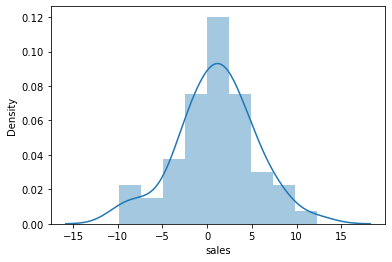

In [69]:
sns.distplot(RF_grid_pred-y_test)

<AxesSubplot:xlabel='sales', ylabel='Density'>

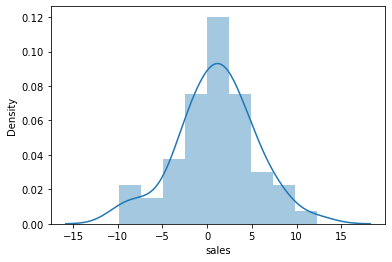

In [70]:
sns.distplot(RF_grid_pred-y_test)

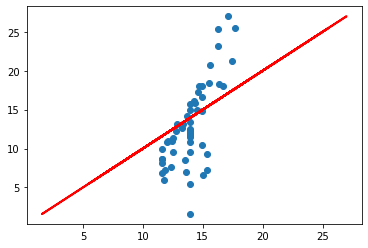

In [71]:
plt.scatter(RF_grid_pred,y_test)
plt.plot(y_test,y_test,linewidth=2,color='Red')

## With GradientBoostingRegressor

In [72]:
GF=GradientBoostingRegressor()
param={'criterion':['mse','mae'],'n_estimators':[100, 200],}


GF_grid=GridSearchCV(RandomForestRegressor(),param,cv=10,scoring='accuracy',n_jobs=-1,verbose=2)


GF_grid.fit(x_train,y_train)
GF_grid_pred=GF_grid.best_estimator_.predict(x_test)


Fitting 10 folds for each of 4 candidates, totalling 40 fits


In [73]:
RF_grid.best_params_


{'criterion': 'mse',
 'max_depth': 1,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [75]:
print('MSE:',mean_squared_error(GF_grid_pred,y_test))
print('MAE:',mean_absolute_error(GF_grid_pred,y_test))
print('r2_score:',r2_score(GF_grid_pred,y_test))

MSE: 0.7083771666666636
MAE: 0.5722407407407405
r2_score: 0.9708125578628825


<AxesSubplot:xlabel='sales', ylabel='Density'>

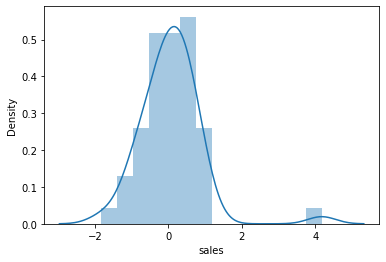

In [76]:
sns.distplot(GF_grid_pred-y_test)

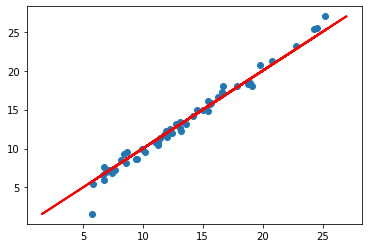

In [77]:
plt.scatter(GF_grid_pred,y_test)
plt.plot(y_test,y_test,linewidth=2,color='Red')

# Choosing GradientBoostingRegressor as the best model


## saving the model

In [78]:
import joblib

In [79]:
joblib.dump(RF_grid.best_estimator_,'Advertising Sales Channel Prediction_Project.obj')

['Advertising Sales Channel Prediction_Project.obj']